<a href="https://colab.research.google.com/github/GangaSuresh/ANN_First/blob/alethia/Copy_of_DLCrash_May.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/Churn_Modelling.csv')
#features independent variables that have impact
X = dataset.iloc[:, 3:12].values
#dependent variable, if customer leaves the bank or not
y = dataset.iloc[:, -1].values
#print(X)
#print(y)

In [ ]:
#encoding categorical data
#change country and gender
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
#country
labelencoder_X_1=LabelEncoder()
X[:,1]=labelencoder_X_1.fit_transform(X[:,1])
#gender
labelencoder_X_2=LabelEncoder()
X[:,2]=labelencoder_X_2.fit_transform(X[:,2])
#to binary only country so we get in 0s and 1s not 0 1 and 2, no need for gender as already 0 and 1
#onehotencoder=OneHotEncoder(categorical_features=[1])
# Country column
ct = ColumnTransformer([("Country", OneHotEncoder(), [1])], remainder = 'passthrough')
#X = ct.fit_transform(X)
X=ct.fit_transform(X)
print(X[0:10,:])
#to remove dummy variable trap remove 1st col
X=X[:,1:]
print(X[0:10,:])

[[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1]
 [0.0 0.0 1.0 608 0 41 1 83807.86 1 0 1]
 [1.0 0.0 0.0 502 0 42 8 159660.8 3 1 0]
 [1.0 0.0 0.0 699 0 39 1 0.0 2 0 0]
 [0.0 0.0 1.0 850 0 43 2 125510.82 1 1 1]
 [0.0 0.0 1.0 645 1 44 8 113755.78 2 1 0]
 [1.0 0.0 0.0 822 1 50 7 0.0 2 1 1]
 [0.0 1.0 0.0 376 0 29 4 115046.74 4 1 0]
 [1.0 0.0 0.0 501 1 44 4 142051.07 2 0 1]
 [1.0 0.0 0.0 684 1 27 2 134603.88 1 1 1]]
[[0.0 0.0 619 0 42 2 0.0 1 1 1]
 [0.0 1.0 608 0 41 1 83807.86 1 0 1]
 [0.0 0.0 502 0 42 8 159660.8 3 1 0]
 [0.0 0.0 699 0 39 1 0.0 2 0 0]
 [0.0 1.0 850 0 43 2 125510.82 1 1 1]
 [0.0 1.0 645 1 44 8 113755.78 2 1 0]
 [0.0 0.0 822 1 50 7 0.0 2 1 1]
 [1.0 0.0 376 0 29 4 115046.74 4 1 0]
 [0.0 0.0 501 1 44 4 142051.07 2 0 1]
 [0.0 0.0 684 1 27 2 134603.88 1 1 1]]


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train[1,:])
print(X_test.size)

[ 1.75486502 -0.57369368 -2.30455945  0.91601335  0.30102557 -1.37744033
 -0.00631193 -0.92159124  0.64259497  0.9687384 ]
20000


***Done with preprocessing, start with ANN***


In [ ]:
#import keras and other packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#initializing the ANN
classifier = Sequential() #NN model the classifier , make object
#input layer number of nodes is number of independent variables here 11
#dense module will take take of step1 ie assigning random weights close to 0
#rectifier function for hidden layers and sigmoid for output layer as we wnt the probability yes or no

#add input layer and first hidden layer, not adding io layer more like adding hidden which gets from io layer
#number of nodes in hidden layer no strict rule, based on experiment usually avg of nodes input and output layer(11+1)/2=6

#init is uniform to uniformly increase weights
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=10))
#2nd hidden layer, no need of input nodes
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))

#output layer, only 1 node and sigmoid activation function
#Note- if last layer has more classes or categories yes, no ,maybe after one hot encoding it will have 3 outputs so 
# 3 nodes in end , also multi class use softmax function
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

#compile the ann, add gradient descent
#optimizer - to find best weights which algo like stochastic gradient descent here called adam
#loss funtion- difference btw actual value and predicted value to minimize, if many categories use categorical_crossentropy
#metrics - list of metrix to evaluate the model here accuracy
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#connect or fit ANN to training set
#batch size to see after how many rows should the weights change, and epochs the total number whole dataset
classifier.fit(X_train,y_train,batch_size=10,epochs=100)



Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5607 - accuracy: 0.8022
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4296 - accuracy: 0.7999
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4278 - accuracy: 0.7992
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4245 - accuracy: 0.7965
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4190 - accuracy: 0.8203
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4183 - accuracy: 0.8273
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4284 - accuracy: 0.8225
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4140 - accuracy: 0.8282
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4188 - accuracy: 0.8283
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4210 - accura

In [ ]:
# Predicting the Test set results probability customers might leave the bank
y_pred = classifier.predict(X_test)

#but we need true or flase if customers leave bank or not
#set a threshold here 0.5. if more then true else false
y_pred=(y_pred>0.5)
print(y_pred[0:10])


[[False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]]


In [ ]:
# Making the Confusion Matrix
#(1,1)+(2,2)= 1496+225 correct predictions and
#(1,2)+(2,1)= 180+99 incorrect predictions
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1549   46]
 [ 271  134]]


In [ ]:
#accuraccy 
print((1496+225)/2000)

0.8605


In [ ]:
pip install aletheia-dnn

In [ ]:
import numpy as np 
import tensorflow as tf
from tensorflow import keras


def ReluNetClassifier(input_dim, hidden_layer_sizes, regl1=0, regl2=0, lr=0.001, random_state=0):

    np.random.seed(random_state) 
    tf.random.set_seed(random_state)

    hidden_layer_sizes = [input_dim] + hidden_layer_sizes
    model = keras.models.Sequential()

    if (regl1 > 0) & (regl2 == 0):
        regularizer = keras.regularizers.l1(regl1)
    elif (regl1 == 0) & (regl2 > 0):
        regularizer = keras.regularizers.l2(regl2)
    else:
        regularizer = keras.regularizers.l1_l2(l1=regl1, l2=regl2)
    
    for i in range(len(hidden_layer_sizes) - 1):
        model.add(keras.layers.Dense(
            input_dim=hidden_layer_sizes[i],
            units=hidden_layer_sizes[i + 1],
            kernel_initializer='he_normal',
            bias_initializer='zeros',
            activation='relu',
            kernel_regularizer=regularizer))

    model.add(keras.layers.Dense(
            units=1,
            input_dim=hidden_layer_sizes[-1],
            kernel_initializer='he_normal',
            bias_initializer='zeros',
            activation='sigmoid',
            kernel_regularizer=regularizer))

    # compile model
    model.compile(optimizer=keras.optimizers.Adam(lr=lr),
                    loss='binary_crossentropy')
    return model


def ReluNetRegressor(input_dim, hidden_layer_sizes, regl1=0, regl2=0, lr=0.001, random_state=0):

    np.random.seed(random_state) 
    tf.random.set_seed(random_state)

    hidden_layer_sizes = [input_dim] + hidden_layer_sizes
    model = keras.models.Sequential()

    if (regl1 > 0) & (regl2 == 0):
        regularizer = keras.regularizers.l1(regl1)
    elif (regl1 == 0) & (regl2 > 0):
        regularizer = keras.regularizers.l2(regl2)
    else:
        regularizer = keras.regularizers.l1_l2(l1=regl1, l2=regl2)

    for i in range(len(hidden_layer_sizes) - 1):
        model.add(keras.layers.Dense(
            input_dim=hidden_layer_sizes[i],
            units=hidden_layer_sizes[i + 1],
            kernel_initializer='he_normal',
            bias_initializer='zeros',
            activation='relu',
            kernel_regularizer=regularizer))

    model.add(keras.layers.Dense(
            units=1,
            input_dim=hidden_layer_sizes[-1],
            kernel_initializer='he_normal',
            bias_initializer='zeros',
            activation='linear',
            kernel_regularizer=regularizer))

    # compile model
    model.compile(optimizer=keras.optimizers.Adam(lr=lr),
                    loss='mean_squared_error')
    return model

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = ReluNetClassifier(X_train.shape[1], [40] * 4, regl1=0.01, lr=0.001, random_state=0)
mlp.fit(X_train, y_train, epochs=2000, batch_size=200, verbose=False)

In [ ]:
# Predicting the Test set results probability customers might leave the bank
y_pred = mlp.predict(X_test)

#but we need true or flase if customers leave bank or not
#set a threshold here 0.5. if more then true else false
y_pred=(y_pred>0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1507   88]
 [ 305  100]]


In [ ]:
from aletheia import *

coefs = [layer.kernel.numpy() for layer in mlp.layers]
intercepts = [layer.bias.numpy() for layer in mlp.layers]
clf = UnwrapperClassifier(coefs, intercepts)
clf.fit(X, y)
clf.summary()

,Count,Response Mean,Response Std,Local AUC,Global AUC
0,3637.0,0.248831,0.432336,0.530920,0.423157
1,1599.0,0.061914,0.240999,0.493899,0.421253
2,1529.0,0.224330,0.417140,0.506873,0.421029
3,1402.0,0.249643,0.432807,0.459249,0.422990
4,1038.0,0.193642,0.395151,0.471400,0.422794
5,282.0,0.244681,0.429898,0.524801,0.422834
6,199.0,0.055276,0.228519,0.500000,0.422137
7,113.0,0.097345,0.296427,0.509804,0.421297
8,107.0,0.084112,0.277556,0.444444,0.421456
9,42.0,0.428571,0.494872,0.500000,0.422163


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """Entry point for launching an IPython kernel.


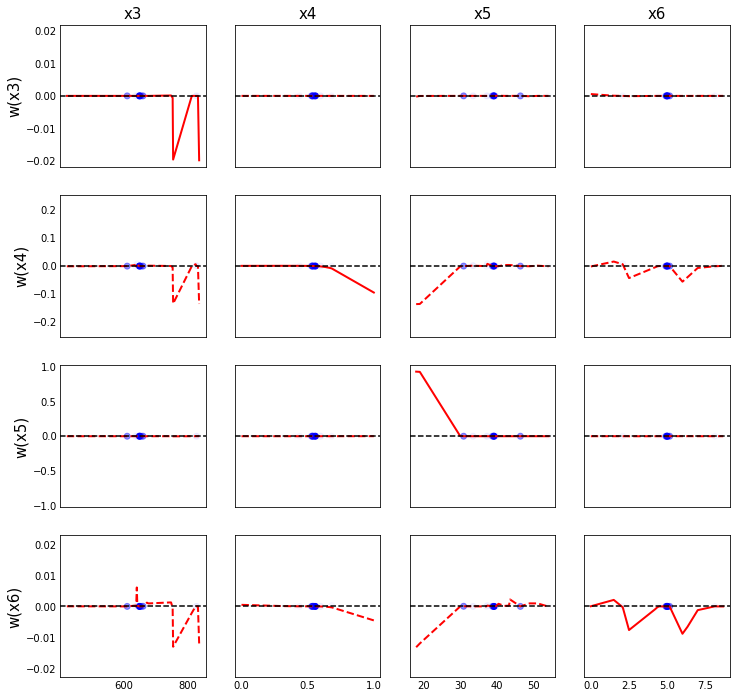

In [ ]:
fig = clf.pair_plot([3,4,5,6], nllms=60, offdiagsmooth=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """Entry point for launching an IPython kernel.


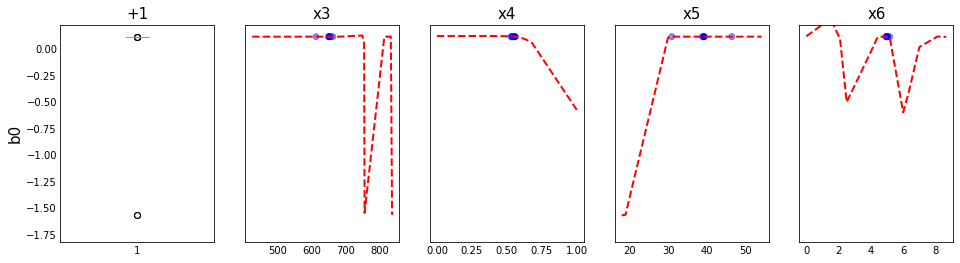

In [ ]:
fig = clf.intercept_plot(feature_idx=[3,4,5,6], nllms=50, figsize=(16, 4))

In [ ]:
restable = clf.local_inference_wald(0)
restable

Count            3637.000000
Response Mean       0.248831
Response Std        0.432336
Local AUC           0.530920
Global AUC          0.423157
Name: 0, dtype: float64


,coef,std err,z,p-value,[0.025,0.975]
b0,-0.000028,0.378839,-0.000073,9.999421e-01,-0.742538,0.742483
x1,0.001447,0.075781,0.019094,9.847659e-01,-0.147081,0.149975
x2,-0.000531,0.091409,-0.005810,9.953646e-01,-0.179690,0.178628
x3,-0.002290,0.000342,-6.693308,2.181815e-11,-0.002960,-0.001619
x4,-0.001026,0.067058,-0.015297,9.877956e-01,-0.132458,0.130406
x5,0.052958,0.003186,16.624090,4.663925e-62,0.046714,0.059202
x6,-0.000283,0.011477,-0.024619,9.803592e-01,-0.022777,0.022212
x7,-0.000013,0.000002,-7.171131,7.438057e-13,-0.000016,-0.000009
x8,0.000840,0.057612,0.014579,9.883678e-01,-0.112078,0.113758
x9,-0.000032,0.072826,-0.000438,9.996508e-01,-0.142768,0.142704


Count            3637.000000
Response Mean       0.248831
Response Std        0.432336
Local AUC           0.530920
Global AUC          0.423157
Name: 0, dtype: float64


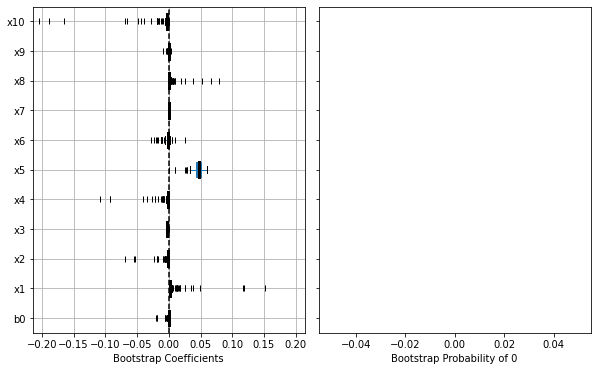

In [ ]:
fig = clf.local_inference_bootstrap(0)

Percentage of Pure LLMs

In [ ]:
len(np.where(clf.ystd_llms == 0)[0]) / clf.nllms

0.2727272727272727

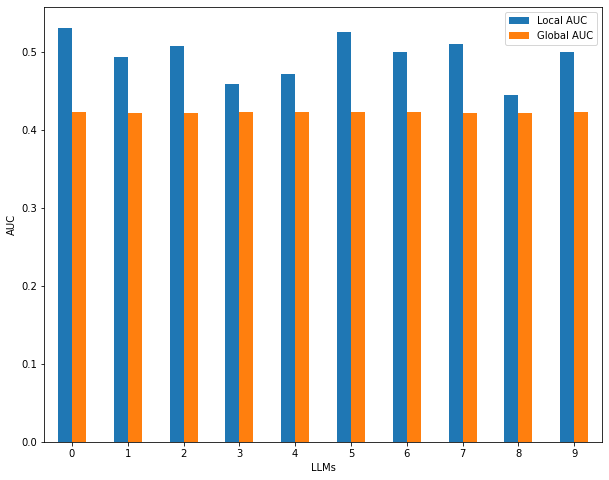

In [ ]:
fig = clf.diagperf_bar(nllms=10, figsize=(10, 8))

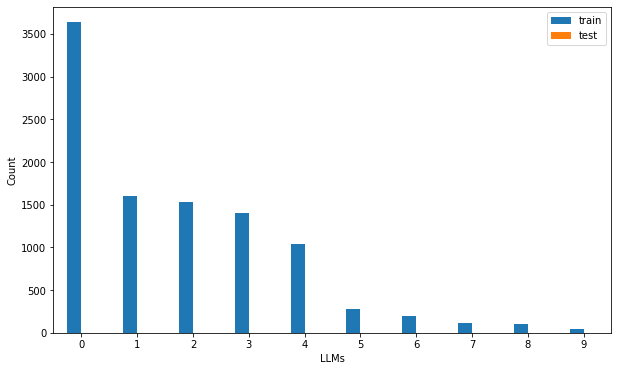

,Count,Response Mean,Response Std,Local AUC,Global AUC
0,0.0,NaN,NaN,NaN,0.5
1,0.0,NaN,NaN,NaN,0.5
2,0.0,NaN,NaN,NaN,0.5
3,0.0,NaN,NaN,NaN,0.5
4,0.0,NaN,NaN,NaN,0.5
5,0.0,NaN,NaN,NaN,0.5
6,0.0,NaN,NaN,NaN,0.5
7,0.0,NaN,NaN,NaN,0.5
8,0.0,NaN,NaN,NaN,0.5
9,0.0,NaN,NaN,NaN,0.5


In [ ]:
restable, fig = clf.evaluate(X_test, y_test, nllms=10)
restable

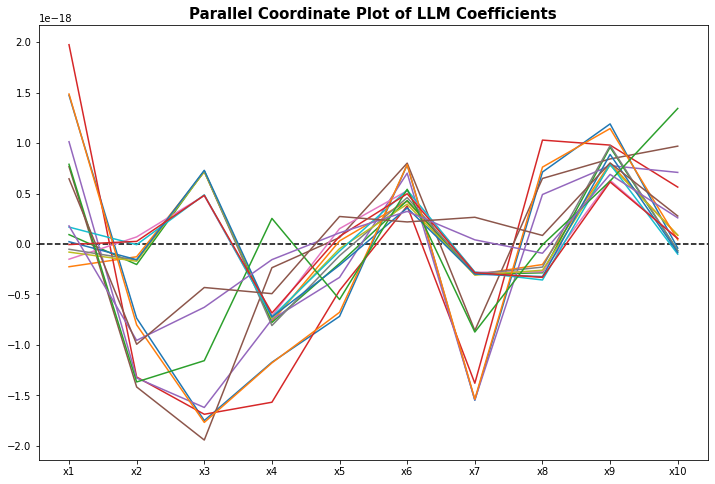

In [ ]:
fig = clf.pc_plot(figsize=(12, 8))

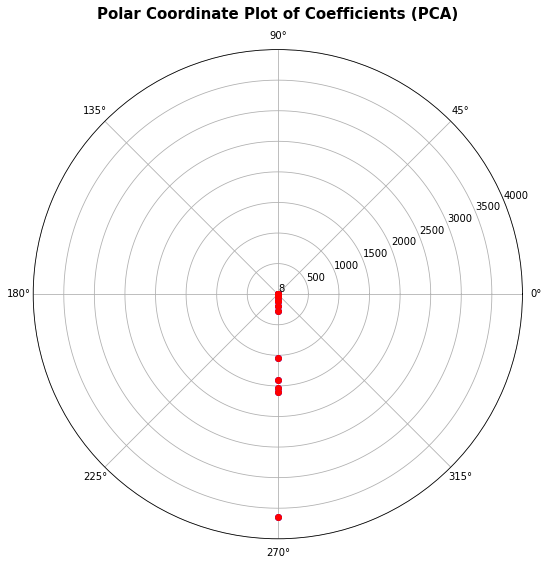

In [ ]:
fig = clf.polar_plot(min_samples=8, figsize=(9, 9))

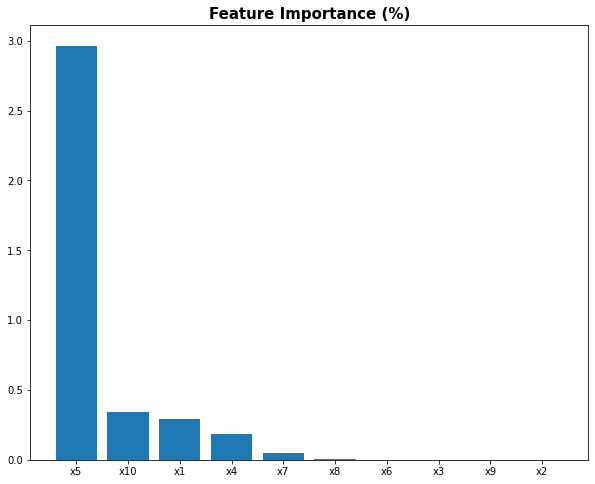

In [ ]:
fig = clf.feature_importance_plot(figsize=(10, 8))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

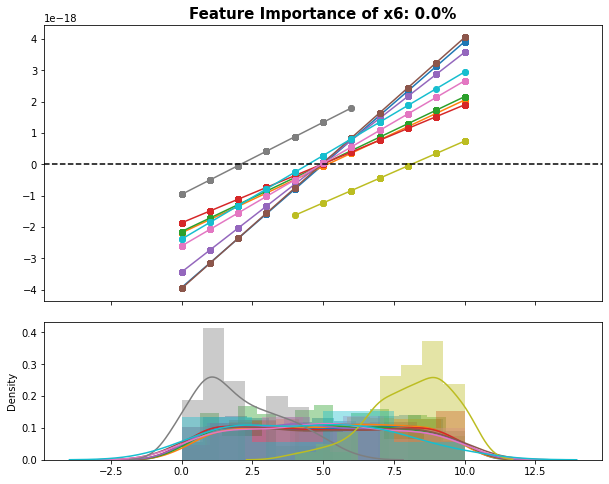

In [ ]:
fig = clf.profile_plot(feature_id=6, nllms=10, figsize=(10, 8))

Simplification

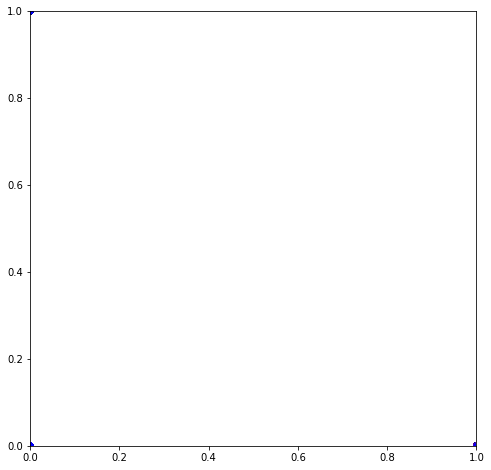

Count            3637.000000
Response Mean       0.248831
Response Std        0.432336
Local AUC           0.530920
Global AUC          0.423157
Name: 0, dtype: float64


,coef,std err,z,p-value,[0.025,0.975]
b0,-0.0000,0.3788,-0.0001,0.9999,-0.7425,0.7425
x1,0.0014,0.0758,0.0191,0.9848,-0.1471,0.1500
x2,-0.0005,0.0914,-0.0058,0.9954,-0.1797,0.1786
x3,-0.0023,0.0003,-6.6933,0.0000,-0.0030,-0.0016
x4,-0.0010,0.0671,-0.0153,0.9878,-0.1325,0.1304
x5,0.0530,0.0032,16.6241,0.0000,0.0467,0.0592
x6,-0.0003,0.0115,-0.0246,0.9804,-0.0228,0.0222
x7,-0.0000,0.0000,-7.1711,0.0000,-0.0000,-0.0000
x8,0.0008,0.0576,0.0146,0.9884,-0.1121,0.1138
x9,-0.0000,0.0728,-0.0004,0.9997,-0.1428,0.1427


In [ ]:
tmpid = 0
clf.visualize2D_one_line(tmpid, figsize=(8, 8))
clf.local_inference_wald(tmpid).round(4)

In [ ]:
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV, PredefinedSplit

datanum = X_train.shape[0]
indices = np.arange(datanum)
idx1, idx2 = train_test_split(indices, test_size=0.2, random_state=1)
val_fold = np.ones((len(indices)))
val_fold[idx1] = -1

grid = GridSearchCV(MergerRegressor(unwrapper=None, 
                                     weights=[layer.kernel.numpy() for layer in mlp.layers], 
                                     biases=[layer.bias.numpy() for layer in mlp.layers],
                                     min_samples=30,
                                     
                                     n_neighbors=np.round(clf.nllms * 0.01).astype(int),
                                     refit_model=LassoCV()),
                                     param_grid={"n_clusters": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]},
                                     scoring={"mse": make_scorer(mean_squared_error, greater_is_better=False)},
                                     cv=PredefinedSplit(val_fold), refit="mse", n_jobs=10, error_score=np.nan)
grid.fit(X_train, y_train)
clf_merge = grid.best_estimator_
clf_merge.summary()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning


ValueError: ignored

In [ ]:
fig = clf_merge.pc_plot(figsize=(12, 8))